In [1]:
#Variable, dependables and setup
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import sys
import csv
import os
from pprint import pprint
from pandas import DataFrame
import datetime as dt

In [2]:
## get key from os
#api_key = os.environ.get('weather_api_key')
api_key = os.environ.get('crime_data_api_key')
#print(api_key)

# URL for National Incident Based Reporting System (NIBRS) - Violent Crimes API call
url = 'https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/violent-crime/offense/national/count?'

query_url = url + 'api_key=' + api_key 
#print(query_url)

In [3]:
crime_data = requests.get(query_url).json()

In [4]:
#print(json.dumps(crime_data, indent=4, sort_keys=True))

In [5]:
crime_data['results'][0]

{'incident_count': 1882, 'offense_count': 2054, 'data_year': 2002}

In [6]:
data_dict = crime_data['results']

In [7]:
df = pd.DataFrame(data_dict)
#df = df.drop(columns=['incident_count'])
df['data_year'] = df['data_year'].apply(np.int64)
df = df.sort_values('data_year')
#df.head(8)

#df.to_csv('offense_api_data.csv', header=True, index=True, index_label= 'Index')
df.head(2)

,data_year,incident_count,offense_count
77,1991,88462,93688
101,1991,23310,26530


In [8]:
#ax1 = df.plot.bar(x='data_year', y='offense_count')

In [9]:
# Normalize NIBRS Violent Crime data to same years as Background Checks
df_mo = df[(df['data_year'] >= 1998 ) & (df['data_year'] <= 2019)].groupby(['data_year'])['offense_count'].sum()
#df_mo.head()

In [10]:
# Grouping the results by month
#df_mo = df.groupby(['data_year'])
#offense_mo=df_mo['offense_count'].sum()
#offense_mo.head()

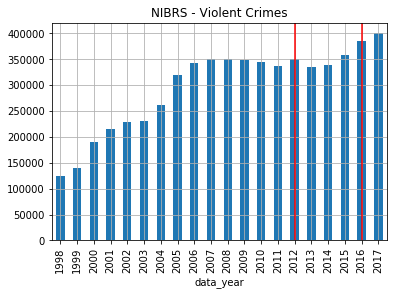

In [11]:
# Plot the National Incident Based Reporting System (NIBRS) - Violent Crimes Data 
ax1 = df_mo.plot.bar(x='data_year', y='offense_count')

# Adding grid, title, and labels
plt.grid(True)
plt.title('NIBRS - Violent Crimes')
#plt.xlabel('x label text')
#plt.ylabel('y label text')

plt.axvline(x=14, ymin=0, ymax=1, color="r")
plt.axvline(x=18, ymin=0, ymax=1, color="r")

plt.savefig('output/NIBRS_Violent_Crimes.png', bbox_inches="tight")
